# Part 1

In [4]:
import pandas as pd 
import pandas_datareader as web
import datetime

In [7]:
start=pd.to_datetime('2020-07-21')
end=datetime.date.today()

In [9]:
reliance=web.DataReader('RELIANCE.NS','yahoo',start,end)
hdfc=web.DataReader('HDFC.NS','yahoo',start,end)
adanipow=web.DataReader('ADANIPOWER.NS','yahoo',start,end)
Adanient=web.DataReader('ADANIENT.NS','yahoo',start,end)

In [11]:
for stock_df in (reliance,hdfc,adanipow,Adanient):
    stock_df['Cumulative Return']=stock_df['Adj Close']/stock_df.iloc[0]['Adj Close']

In [16]:
# 30% in reliance
# 20% in hdfc
# 40% in Adani Power
# 10% in Adani ent

In [18]:
for stock_df,allo in zip((reliance,hdfc,adanipow,Adanient),[.3,.2,.4,.1]):
    stock_df['Allocation']=stock_df['Cumulative Return']*allo

In [20]:
adanipow.tail()

,High,Low,Open,Close,Volume,Adj Close,Cumulative Return,Allocation
Date,,,,,,,,
2021-07-14,108.500000,104.800003,107.800003,105.050003,2239191.0,105.050003,2.980142,1.192057
2021-07-15,106.000000,103.250000,105.050003,104.099998,2351596.0,104.099998,2.953191,1.181277
2021-07-16,107.900002,102.000000,104.099998,105.650002,3420046.0,105.650002,2.997163,1.198865
2021-07-19,107.750000,100.449997,105.650002,102.150002,5073034.0,102.150002,2.897872,1.159149
2021-07-20,98.800003,97.050003,97.050003,97.050003,4880468.0,97.050003,2.753192,1.101277


In [22]:
for stock_df in (reliance,hdfc,adanipow,Adanient):
    stock_df['Position Values']=stock_df['Allocation']*10000000

In [23]:
Adanient.tail()

,High,Low,Open,Close,Volume,Adj Close,Cumulative Return,Allocation,Position Values
Date,,,,,,,,,
2021-07-14,1449.000000,1397.800049,1449.0,1402.050049,3859529.0,1402.050049,8.386017,0.838602,8.386017e+06
2021-07-15,1429.000000,1393.400024,1399.0,1407.949951,2728305.0,1407.949951,8.421306,0.842131,8.421306e+06
2021-07-16,1415.000000,1388.250000,1409.0,1395.500000,2134914.0,1395.500000,8.346840,0.834684,8.346840e+06
2021-07-19,1412.650024,1332.750000,1390.0,1380.599976,6190302.0,1380.599976,8.257719,0.825772,8.257719e+06
2021-07-20,1382.900024,1336.099976,1340.0,1365.699951,4529933.0,1365.699951,8.168598,0.816860,8.168598e+06


In [27]:
pos_val=pd.concat([reliance['Position Values'],hdfc['Position Values'],adanipow['Position Values'],Adanient['Position Values']],axis=1)

In [29]:
pos_val.columns=['Reliance','HDFC','Adani Power','Adani Enterprises']

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Date'>

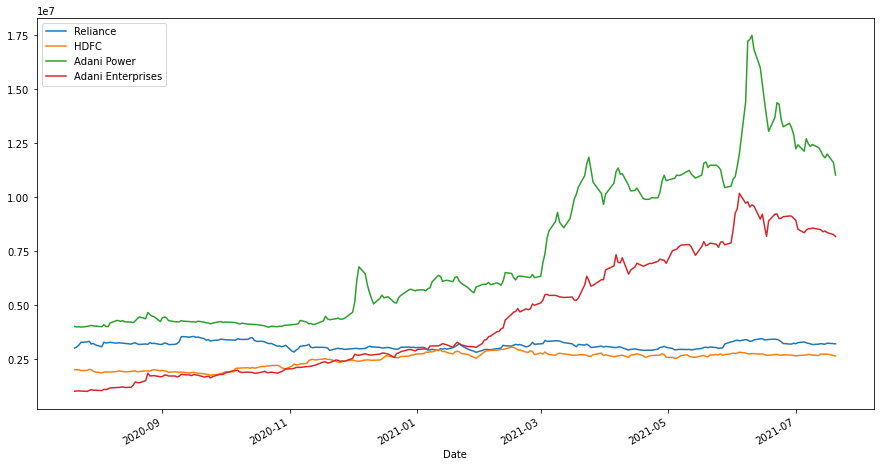

In [31]:
pos_val.plot(figsize=(15,8))

# Part 2

In [38]:
pos_val['Total Position']=pos_val['Reliance']+pos_val['HDFC']+pos_val['Adani Power']+pos_val['Adani Enterprises']

In [39]:
pos_val['Daily Return']=pos_val['Total Position'].pct_change(1)

In [40]:
pos_val.head()

,Reliance,HDFC,Adani Power,Adani Enterprises,Total Position,Daily Return
Date,,,,,,
2020-07-21,3.000000e+06,2.000000e+06,4.000000e+06,1.000000e+06,1.000000e+07,NaN
2020-07-22,3.049377e+06,1.997239e+06,3.977305e+06,1.012552e+06,1.003647e+07,0.003647
2020-07-23,3.131242e+06,1.991665e+06,3.988653e+06,1.015840e+06,1.012740e+07,0.009060
2020-07-24,3.265679e+06,1.955034e+06,3.971631e+06,1.008667e+06,1.020101e+07,0.007269
2020-07-27,3.280972e+06,1.965068e+06,4.000000e+06,9.919307e+05,1.023797e+07,0.003623


In [41]:
pos_val['Daily Return'].mean()

0.003911268271888031

<AxesSubplot:ylabel='Density'>

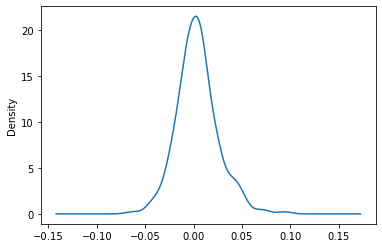

In [43]:
pos_val['Daily Return'].plot(kind='kde')

In [44]:
cumulstive_return = (pos_val['Total Position'][-1]-pos_val['Total Position'][0])/pos_val['Total Position'][0]

In [46]:
Sharp_Ratio=pos_val['Daily Return'].mean()/pos_val['Daily Return'].std()

In [48]:
Sharp_Ratio

0.1839859536572779

In [49]:
Sharp_Ratio*(252**0.5)

2.9206864686372724